# Лабораторная работа №1: Первичное исследование данных

## 1. Постановка задачи

### Описание датасета
[Ваш текст здесь]

### Условный заказчик
[Кто может использовать эти данные]

### Возможные задачи ИАД
1. [Задача 1]
2. [Задача 2]
3. [Задача 3]

## 2. Паспорт датасета

### Загрузка данных

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Загрузка данных
df = pd.read_csv(r'C:\Users\дмитрий\Desktop\лабы\bmw.csv') # Путь к вашему файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()

Размер датасета: 10781 строк, 9 столбцов


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### Структура данных

In [5]:
# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  str    
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  str    
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  str    
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), str(3)
memory usage: 758.2 KB


,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


## 3. Аудит качества данных

### 3.1. Пропуски

In [10]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

missing[missing['Пропуски'] > 0]

,Пропуски,Доля (%)


### 3.2. Дубликаты

In [7]:
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')

Полных дубликатов строк: 117


### 3.3. Выбросы (пример для одного признака)

Выбросов по методу IQR: 2733


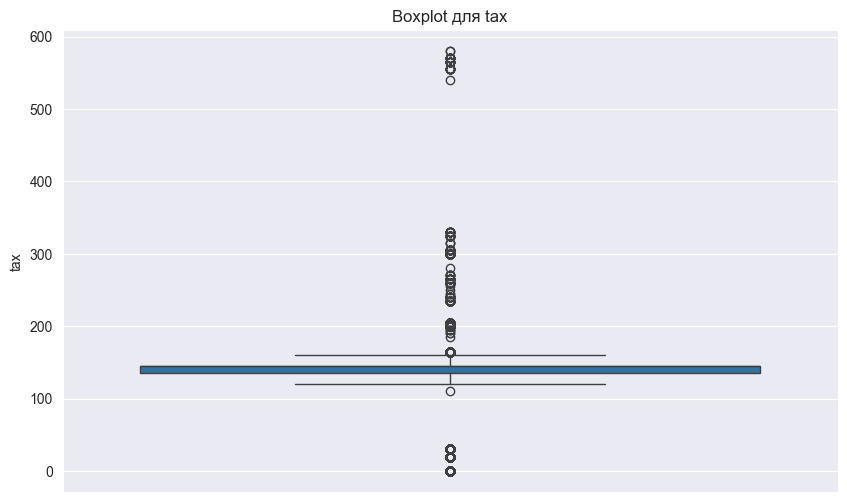

In [14]:
    # Замените 'your_numeric_column' на реальное название столбца
column = 'tax'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f'Выбросов по методу IQR: {len(outliers)}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=column)
plt.title(f'Boxplot для {column}')
plt.show()

## 4. Разведочный анализ (EDA)

### 4.1. Распределение числового признака

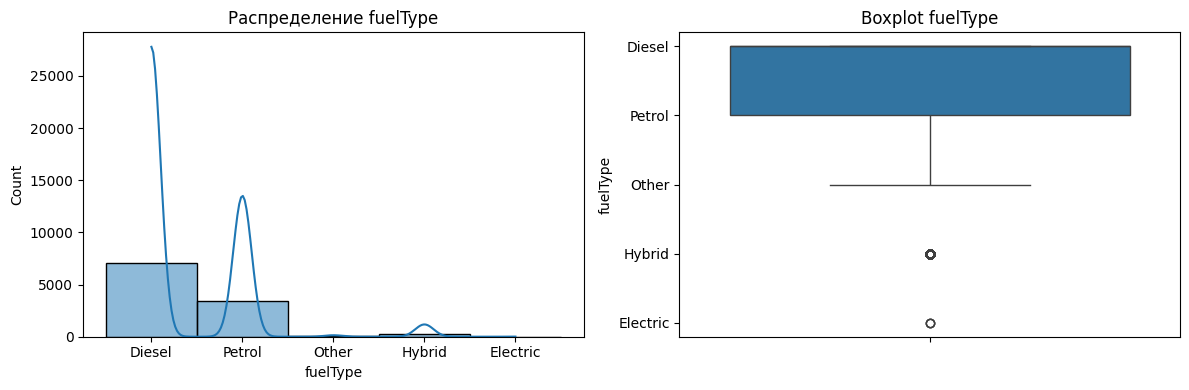

In [16]:
# Замените на реальный признак
numeric_col = 'fuelType'

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col], kde=True)
plt.title(f'Распределение {numeric_col}')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[numeric_col])
plt.title(f'Boxplot {numeric_col}')
plt.tight_layout()
plt.show()

### 4.2. Анализ категориального признака

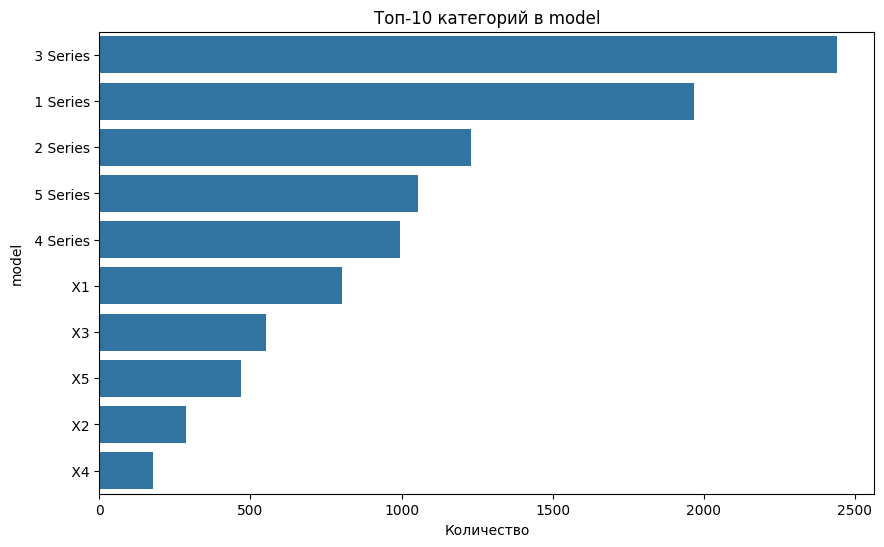

In [18]:
# Замените на реальный категориальный признак
cat_col = 'model'

plt.figure(figsize=(10, 6))
top_categories = df[cat_col].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f'Топ-10 категорий в {cat_col}')
plt.xlabel('Количество')
plt.show()

## 5. Выводы

Детали в файле `report/quality_report.md`